In [1]:
%pip install numpy scikit-learn matplotlib umap-learn openai google-generativeai python-dotenv


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.3 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 44.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 90.7 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 53.9 MB/s eta 0:00:01
     |████████████████████

In [1]:

import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.metrics.pairwise import cosine_similarity
import openai
import google.generativeai as genai
import os


In [3]:
# Load OpenAI embeddings
with open('embeddings_output.json', 'r') as f:
    openai_data = json.load(f)

# Load Gemini embeddings
with open('embeddings_output_gemini.json', 'r') as f:
    gemini_data = json.load(f)

print(f" Loaded {len(openai_data)} OpenAI embeddings")
print(f" Loaded {len(gemini_data)} Gemini embeddings")
print(f"OpenAI dimensions: {len(openai_data[0]['embedding'])}")
print(f"Gemini dimensions: {len(gemini_data[0]['embedding'])}")

 Loaded 1000 OpenAI embeddings
 Loaded 1000 Gemini embeddings
OpenAI dimensions: 1536
Gemini dimensions: 768


Running t-SNE on OpenAI embeddings...


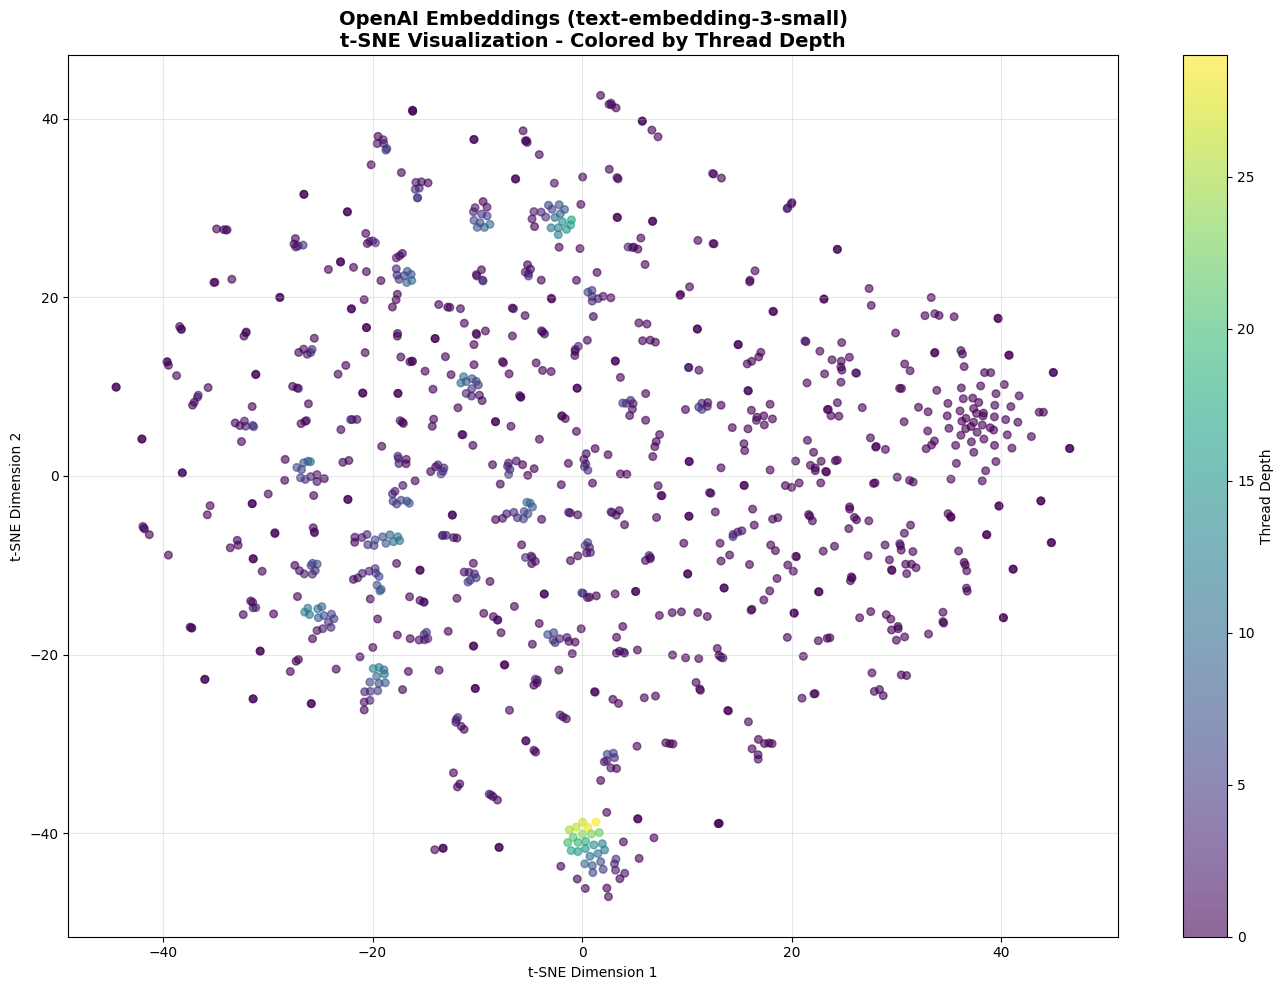

In [6]:
openai_embeddings = np.array([item['embedding'] for item in openai_data])
openai_depths = [item['depth'] for item in openai_data]
openai_is_root = [item['is_root'] for item in openai_data]

# Apply t-SNE (this may take a minute)
print("Running t-SNE on OpenAI embeddings...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
openai_2d = tsne.fit_transform(openai_embeddings)

# Plot colored by thread depth
plt.figure(figsize=(14, 10))
scatter = plt.scatter(openai_2d[:, 0], openai_2d[:, 1], 
                     c=openai_depths, cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Thread Depth')
plt.title('OpenAI Embeddings (text-embedding-3-small)\nt-SNE Visualization - Colored by Thread Depth', 
          fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Running t-SNE on Gemini embeddings...


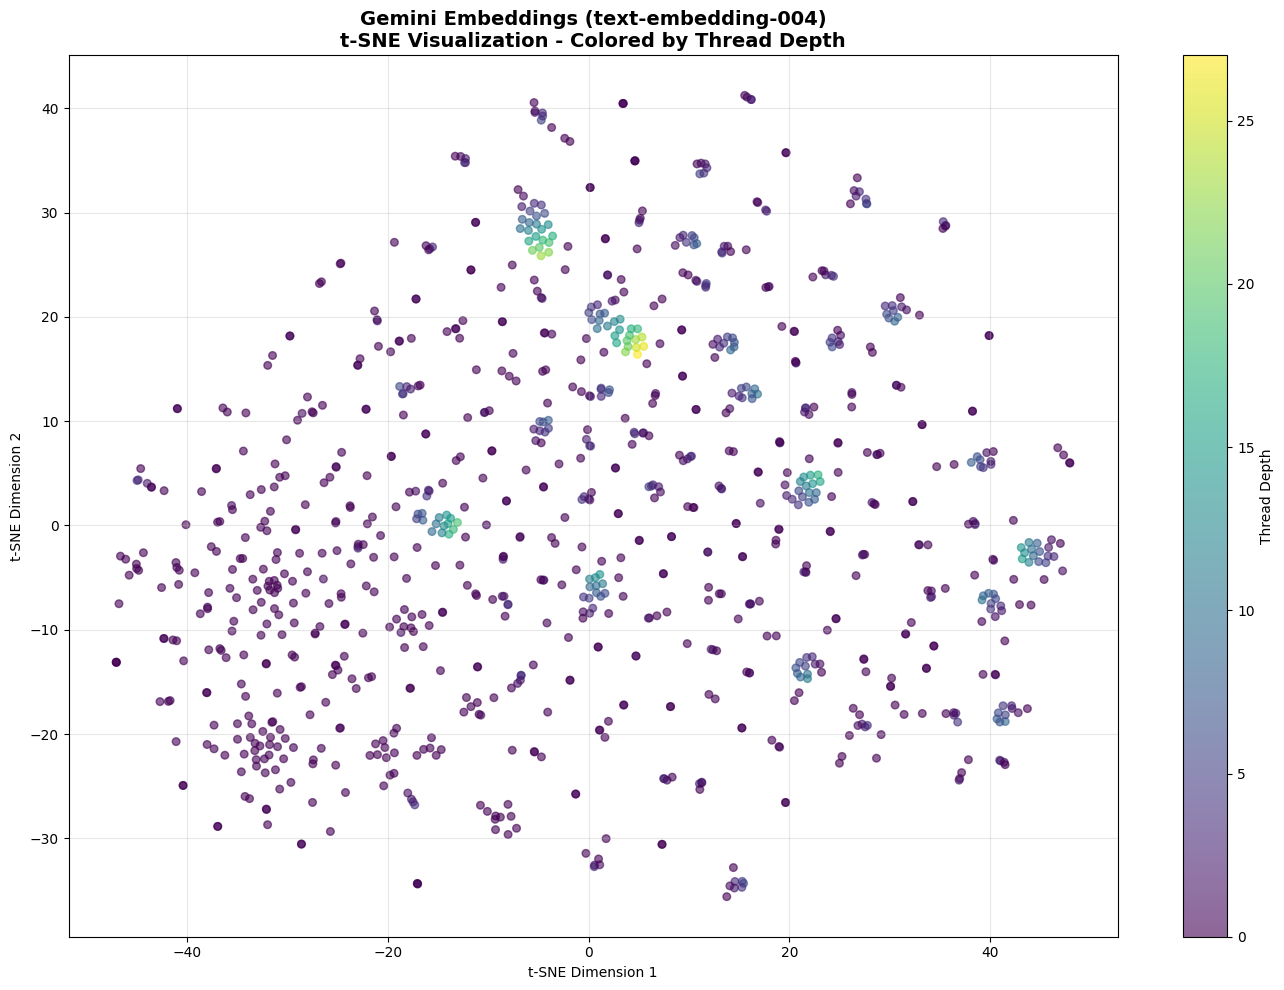

In [7]:
# Extract embeddings and metadata
gemini_embeddings = np.array([item['embedding'] for item in gemini_data])
gemini_depths = [item['depth'] for item in gemini_data]
gemini_is_root = [item['is_root'] for item in gemini_data]

# Apply t-SNE
print("Running t-SNE on Gemini embeddings...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
gemini_2d = tsne.fit_transform(gemini_embeddings)

# Plot colored by thread depth
plt.figure(figsize=(14, 10))
scatter = plt.scatter(gemini_2d[:, 0], gemini_2d[:, 1], 
                     c=gemini_depths, cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Thread Depth')
plt.title('Gemini Embeddings (text-embedding-004)\nt-SNE Visualization - Colored by Thread Depth', 
          fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Depth Distribution Comparison:

Depth | OpenAI | Gemini
------------------------------
    0 |    564 |    538
    1 |    143 |    145
    2 |     78 |     74
    3 |     52 |     53
    4 |     38 |     38
    5 |     26 |     24
    6 |     18 |     20
    7 |     14 |     16
    8 |     12 |     15
    9 |     11 |     12
   10 |     10 |      9
   11 |      5 |      7
   12 |      5 |      6
   13 |      4 |      6
   14 |      2 |      6
   15 |      2 |      5
   16 |      2 |      4
   17 |      2 |      4
   18 |      1 |      3
   19 |      1 |      3
   20 |      1 |      2
   21 |      1 |      2
   22 |      1 |      2
   23 |      1 |      2
   24 |      1 |      1
   25 |      1 |      1
   26 |      1 |      1
   27 |      1 |      1
   28 |      1 |      0
   29 |      1 |      0


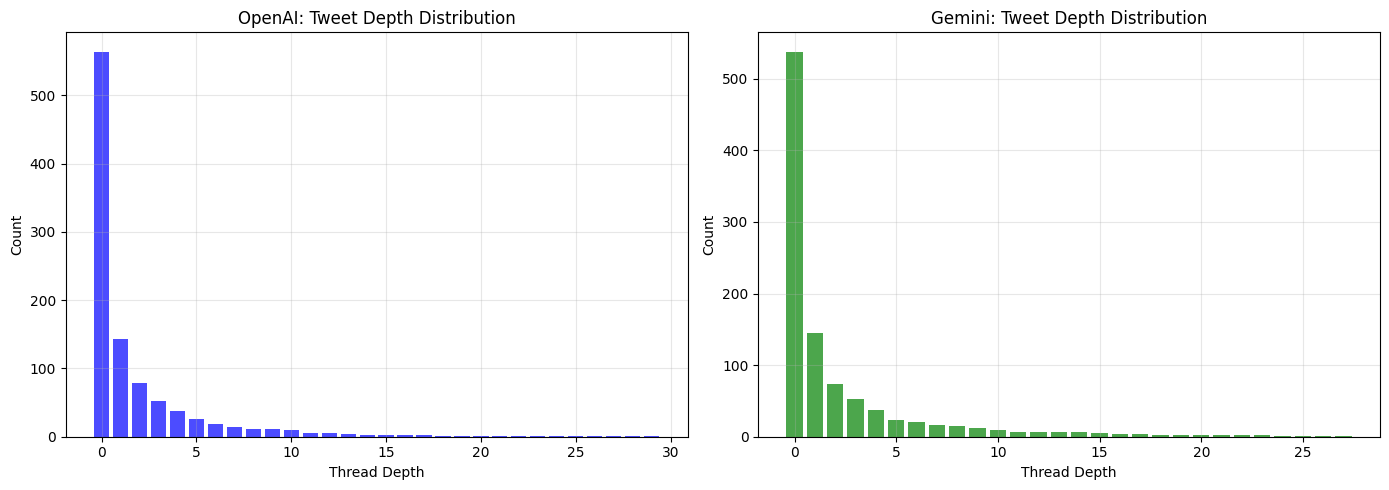

In [8]:
import matplotlib.pyplot as plt

# Check depth distribution for both datasets
openai_depth_counts = {}
for item in openai_data:
    depth = item['depth']
    openai_depth_counts[depth] = openai_depth_counts.get(depth, 0) + 1

gemini_depth_counts = {}
for item in gemini_data:
    depth = item['depth']
    gemini_depth_counts[depth] = gemini_depth_counts.get(depth, 0) + 1

# Print comparison
print("Depth Distribution Comparison:\n")
print("Depth | OpenAI | Gemini")
print("-" * 30)
all_depths = sorted(set(list(openai_depth_counts.keys()) + list(gemini_depth_counts.keys())))
for depth in all_depths:
    openai_count = openai_depth_counts.get(depth, 0)
    gemini_count = gemini_depth_counts.get(depth, 0)
    print(f"{depth:5d} | {openai_count:6d} | {gemini_count:6d}")

# Visualize side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# OpenAI histogram
ax1.bar(openai_depth_counts.keys(), openai_depth_counts.values(), color='blue', alpha=0.7)
ax1.set_title('OpenAI: Tweet Depth Distribution')
ax1.set_xlabel('Thread Depth')
ax1.set_ylabel('Count')
ax1.grid(alpha=0.3)

# Gemini histogram
ax2.bar(gemini_depth_counts.keys(), gemini_depth_counts.values(), color='green', alpha=0.7)
ax2.set_title('Gemini: Tweet Depth Distribution')
ax2.set_xlabel('Thread Depth')
ax2.set_ylabel('Count')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()